In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import nltk
from os import listdir
from os.path import isfile, join


sns.set(rc={'figure.figsize':(15,8.27)})
sns.set(style="whitegrid")

In [2]:
example_file_path = '/Users/attilanagy/Personal/hu-nmt/data/ftp.mokk.bme.hu/Hunglish2/classic.lit/bi/Andersen_1.bi'
base_data_dir = '/Users/attilanagy/Personal/hu-nmt/data/ftp.mokk.bme.hu/Hunglish2'
domains = [
    'classic.lit',
    'law',
    'modern.lit',
    'softwaredocs',
    'subtitles'
]

## Notes
### Law folder is not in the same structure as the others
 Copied files from law/nonagg/1/bi and law/nonagg/2 to law/bi

In [3]:
def dump_domain_content_to_file(sentences, domain):
    with open(f'{domain}.txt', 'w+') as f:
        for sentence_pair in sentences:
            f.write('\t'.join(sentence_pair)+'\n')

In [4]:
sentence_pairs = []
malformed_lines = {}
for domain in domains: 
    # domain = domains[0]
    domain_path = f'{base_data_dir}/{domain}/bi'
    files = [f for f in listdir(f'{domain_path}') if isfile(join(f'{domain_path}', f))]
    for file in files:
        with open(f'{domain_path}/{file}', 'r', encoding='latin2') as f:
            for line in f:
                try:
                    hun_eng_sentence_pair = line.rstrip('\n').split('\t')
                    hun_eng_sentence_pair.append(domain)
                    if len(hun_eng_sentence_pair) != 3: # hun-eng-dom
                        raise ValueError(f'Hun-eng sentence pair {hun_eng_sentence_pair} has bad formatting')
                    sentence_pairs.append(hun_eng_sentence_pair)
                except:
                    if domain not in malformed_lines:
                        malformed_lines[domain] = []
                    malformed_lines[domain].append((f'line: {line}', f'file: {file}'))

## Check lines where we could not separate by \t

In [5]:
print(json.dumps(malformed_lines, sort_keys=True, indent=2))

{
  "classic.lit": [
    [
      "line: \t\n",
      "file: Bible_2.bi"
    ],
    [
      "line: \t\n",
      "file: Shakespeare_14.bi"
    ],
    [
      "line: \t\n",
      "file: Shakespeare_8.bi"
    ],
    [
      "line: \t\n",
      "file: Stevenson_2.bi"
    ],
    [
      "line: 15.\t\n",
      "file: Stevenson_2.bi"
    ],
    [
      "line: 25.\t\n",
      "file: Stevenson_2.bi"
    ],
    [
      "line: 28.\t\n",
      "file: Stevenson_2.bi"
    ],
    [
      "line: 6.\t\n",
      "file: Stevenson_2.bi"
    ],
    [
      "line: \t\n",
      "file: Austen_2.bi"
    ],
    [
      "line: \t- \" \n",
      "file: Austen_2.bi"
    ],
    [
      "line: \t'Ah!\n",
      "file: Dickens_2.bi"
    ],
    [
      "line: \t'Oh!\n",
      "file: Dickens_2.bi"
    ],
    [
      "line: \t\n",
      "file: Racine_1.bi"
    ],
    [
      "line: \t\n",
      "file: Shakespeare_10.bi"
    ],
    [
      "line: \tDuk.\n",
      "file: Shakespeare_10.bi"
    ],
    [
      "line: \tEsc.\n

In [6]:
# use this to concat separate files to a single domain-specific file
dump_domain_content_to_file(sentence_pairs, domain)

In [7]:
malformed_lines

{'classic.lit': [('line: \t\n', 'file: Bible_2.bi'),
  ('line: \t\n', 'file: Shakespeare_14.bi'),
  ('line: \t\n', 'file: Shakespeare_8.bi'),
  ('line: \t\n', 'file: Stevenson_2.bi'),
  ('line: 15.\t\n', 'file: Stevenson_2.bi'),
  ('line: 25.\t\n', 'file: Stevenson_2.bi'),
  ('line: 28.\t\n', 'file: Stevenson_2.bi'),
  ('line: 6.\t\n', 'file: Stevenson_2.bi'),
  ('line: \t\n', 'file: Austen_2.bi'),
  ('line: \t- " \n', 'file: Austen_2.bi'),
  ("line: \t'Ah!\n", 'file: Dickens_2.bi'),
  ("line: \t'Oh!\n", 'file: Dickens_2.bi'),
  ('line: \t\n', 'file: Racine_1.bi'),
  ('line: \t\n', 'file: Shakespeare_10.bi'),
  ('line: \tDuk.\n', 'file: Shakespeare_10.bi'),
  ('line: \tEsc.\n', 'file: Shakespeare_10.bi'),
  ('line: \tNo \n', 'file: Shakespeare_10.bi'),
  ('line: \tPro.\n', 'file: Shakespeare_10.bi'),
  ('line: \t\n', 'file: Scott_1.bi'),
  ('line: --- \t\n', 'file: Shuffle'),
  ('line: . \t\n', 'file: Shuffle'),
  ('line: (?)!\t\n', 'file: Shuffle'),
  ('line: * \t\n', 'file: Shuffle')

In [18]:
print(json.dumps({domain: len(malformed_lines[domain]) for domain in malformed_lines}, sort_keys=True, indent=2))

{
  "classic.lit": 857,
  "law": 1214,
  "modern.lit": 428,
  "softwaredocs": 33
}


In [19]:
sentence_pairs[0:3]

[['A 11. esztendőben, a hónap elsején az Úr szózatot intézett hozzám: "Emberfia, Tírusz így nevetett Jeruzsálemen: Összetört a népek kapuja és felém fordult.',
  'And it came to pass in the eleventh year, the first day of the month, that the word of the Lord came to me, saying:',
  'classic.lit'],
 ['A 11. esztendőben, az első hónapban, a hó hetedik napján az Úr ezt a szózatot intézte hozzám: Emberfia, összetörtem a fáraónak, Egyiptom királyának a karját.',
  'And it came to pass in the eleventh year, in the first month, in the seventh day of the month, that the word of the Lord came, me, saying:',
  'classic.lit'],
 ['A 145. esztendő Kiszleu hónapjának tizenötödik napján a király az égőáldozat oltárán szörnyű undokságot épített, és Izrael helységeiben mindenféle oltárokat emeltek.',
  'On the fifteenth day of the month, Casleu, in the hundred and forty-fifth year, king Antiochus set up the abominable idol of desolation upon the altar of God, and they built altars throughout all the ci

In [95]:
len(sentence_pairs)

2983005

In [20]:
df = pd.DataFrame(sentence_pairs, columns=['hun', 'eng', 'domain'])

In [21]:
df

,hun,eng,domain
0,"A 11. esztendőben, a hónap elsején az Úr szóza...","And it came to pass in the eleventh year, the ...",classic.lit
1,"A 11. esztendőben, az első hónapban, a hó hete...","And it came to pass in the eleventh year, in t...",classic.lit
2,A 145. esztendő Kiszleu hónapjának tizenötödik...,"On the fifteenth day of the month, Casleu, in ...",classic.lit
3,A 148. esztendőben a kilencedik hónap - azaz a...,And they arose before the morning on the five ...,classic.lit
4,"A 151. esztendőben Szeleukusz fia, Demetriusz ...","In the hundred and fifty-first year, Demetrius...",classic.lit
...,...,...,...
2983000,Zsoldos?,Mercenary?,subtitles
2983001,Zsúfolt hely.,Crowded.,subtitles
2983002,Zsugori geci.,"""Early Girl.""",subtitles
2983003,"Zsugoriság... akasztás, önpusztítás.","Avarice... hanging, self-destruction.",subtitles


In [24]:
df['hun_len_word'] = df['hun'].apply(lambda x: len(x.split()))
df['eng_len_word'] = df['eng'].apply(lambda x: len(x.split()))
df['hun_len_char'] = df['hun'].apply(lambda x: len(x))
df['eng_len_char'] = df['eng'].apply(lambda x: len(x))


In [12]:
df

,hun,eng,domain,hun_len_word,eng_len_word,hun_len_char,eng_len_char
0,"A 11. esztendőben, a hónap elsején az Úr szóza...","And it came to pass in the eleventh year, the ...",classic.lit,23,25,154,115
1,"A 11. esztendőben, az első hónapban, a hó hete...","And it came to pass in the eleventh year, in t...",classic.lit,25,29,157,138
2,A 145. esztendő Kiszleu hónapjának tizenötödik...,"On the fifteenth day of the month, Casleu, in ...",classic.lit,21,40,165,227
3,A 148. esztendőben a kilencedik hónap - azaz a...,And they arose before the morning on the five ...,classic.lit,28,28,187,152
4,"A 151. esztendőben Szeleukusz fia, Demetriusz ...","In the hundred and fifty-first year, Demetrius...",classic.lit,19,33,147,174
...,...,...,...,...,...,...,...
2983000,Zsoldos?,Mercenary?,subtitles,1,1,8,10
2983001,Zsúfolt hely.,Crowded.,subtitles,2,1,13,8
2983002,Zsugori geci.,"""Early Girl.""",subtitles,2,2,13,13
2983003,"Zsugoriság... akasztás, önpusztítás.","Avarice... hanging, self-destruction.",subtitles,3,3,36,37


In [25]:
def get_len_metrics(df):
    metrics = {}
    for language in ['hun', 'eng']:
        metrics[language] = {}
        for mode in ['word', 'char']:
            metrics[language][mode] = {}
            col = f'{language}_len_{mode}'
            metrics[language][mode]['q0.25'] = str(df[col].quantile(q=0.25))
            metrics[language][mode]['q0.5'] = str(df[col].quantile(q=0.5))
            metrics[language][mode]['q0.75'] = str(df[col].quantile(q=0.75))
            metrics[language][mode]['q0.99'] = str(df[col].quantile(q=0.99))
            metrics[language][mode]['q0.999'] = str(df[col].quantile(q=0.999))
            metrics[language][mode]['min'] = str(df[col].min())
            metrics[language][mode]['max'] = str(df[col].max())
            metrics[language][mode]['mean'] = str(df[col].mean())
            metrics[language][mode]['stdev'] = str(df[col].std())

    return metrics

In [26]:
len_metrics = get_len_metrics(df)
print(json.dumps(len_metrics, sort_keys=True, indent=4))

{
    "eng": {
        "char": {
            "max": "4000",
            "mean": "68.14158709086978",
            "min": "1",
            "q0.25": "25.0",
            "q0.5": "48.0",
            "q0.75": "89.0",
            "q0.99": "318.0",
            "q0.999": "703.0",
            "stdev": "70.70722284202019"
        },
        "word": {
            "max": "663",
            "mean": "12.29764784168984",
            "min": "1",
            "q0.25": "5.0",
            "q0.5": "9.0",
            "q0.75": "16.0",
            "q0.99": "55.0",
            "q0.999": "116.0",
            "stdev": "12.168706088022295"
        }
    },
    "hun": {
        "char": {
            "max": "4000",
            "mean": "67.9746202235665",
            "min": "2",
            "q0.25": "25.0",
            "q0.5": "48.0",
            "q0.75": "88.0",
            "q0.99": "322.0",
            "q0.999": "705.9960000002757",
            "stdev": "71.23069592531436"
        },
        "word": {
            "

## Sample sentence length distribution - word and character level

[Text(0.5, 0, 'ENG - Sentence length (char)'), Text(0, 0.5, 'Frequency')]

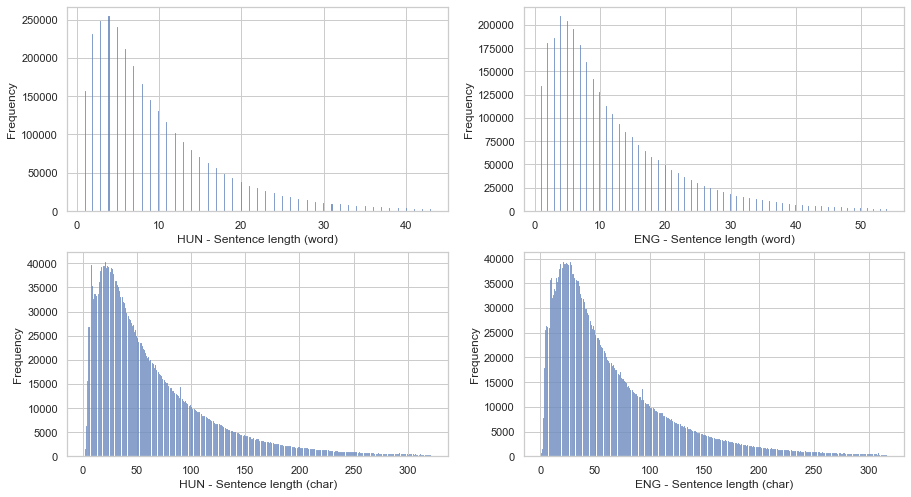

In [27]:
fig, axs = plt.subplots(2,2)

sns.histplot(df[df['hun_len_word'] < int(float(len_metrics['hun']['word']['q0.99']))]['hun_len_word'], ax=axs[0, 0])
axs[0, 0].set(xlabel='HUN - Sentence length (word)', ylabel='Frequency')

sns.histplot(df[df['eng_len_word'] < int(float(len_metrics['eng']['word']['q0.99']))]['eng_len_word'], ax=axs[0, 1])
axs[0, 1].set(xlabel='ENG - Sentence length (word)', ylabel='Frequency')

sns.histplot(df[df['hun_len_char'] < int(float(len_metrics['hun']['char']['q0.99']))]['hun_len_char'], ax=axs[1, 0])
axs[1, 0].set(xlabel='HUN - Sentence length (char)', ylabel='Frequency')

sns.histplot(df[df['eng_len_char'] < int(float(len_metrics['eng']['char']['q0.99']))]['eng_len_char'], ax=axs[1, 1])
axs[1, 1].set(xlabel='ENG - Sentence length (char)', ylabel='Frequency')




## Domain distribution

In [28]:
freqs = df[['hun', 'domain']].groupby('domain').count().reset_index()
freqs

,domain,hun
0,classic.lit,651285
1,law,183249
2,modern.lit,1669701
3,softwaredocs,135439
4,subtitles,343331


### TODO: Check huggingface datasets

2983005


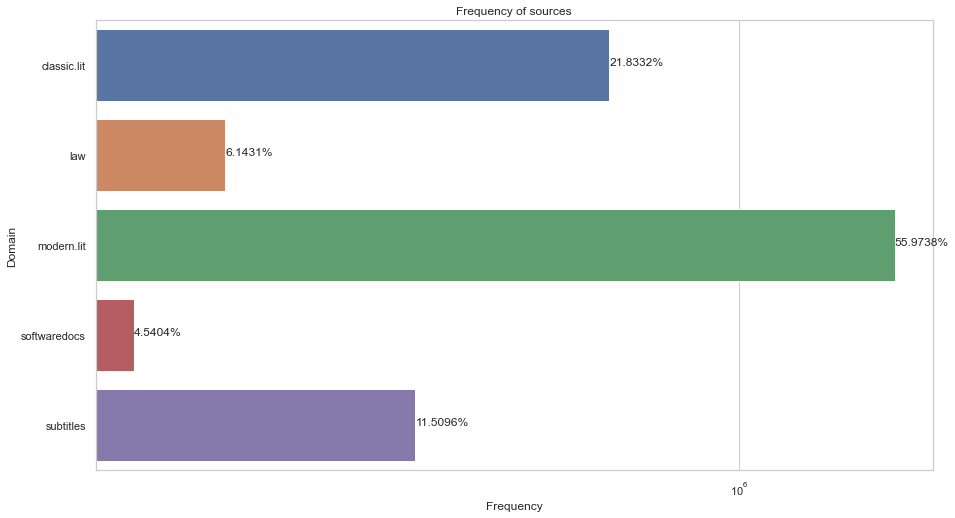

In [29]:
ax = sns.barplot(x='hun' ,y='domain', data=freqs)
ax.set_xscale("log")
ax.set_title('Frequency of sources')
ax.set(xlabel='Frequency', ylabel='Domain')

total = freqs['hun'].sum()
print(total)
for p in ax.patches:
        percentage = '{:.4f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

### Category distribution does not match original
Original distribution: http://mokk.bme.hu/resources/hunglishcorpus/


In [34]:
# num of bisentences
total = 4151
reported_cnts = {
    'modern.lit': 1670,
    'classical.lit': 652,
    'subtitles': 343,
    'softwaredocs': 135,
    'law': 1351
}
reported_ratios = {domain: reported_cnts[domain]/total for domain in reported_cnts}
print(json.dumps(reported_ratios, sort_keys=True, indent=2))

{
  "classical.lit": 0.15707058540110816,
  "law": 0.3254637436762226,
  "modern.lit": 0.40231269573596723,
  "softwaredocs": 0.032522283787039266,
  "subtitles": 0.08263069139966273
}


## Vocabulary

In [92]:
def get_vocab(corpus, n_gram=1):
    """
    corpus: list of sentences
    """
    vocab_dict = {}
    if n_gram == 1:
        for sentence in corpus:
            words = sentence.split()
            for word in words:
                if word not in vocab_dict:
                    vocab_dict[word] = 1
                else:
                    vocab_dict[word] += 1
    elif n_gram == 2:
        for sentence in corpus:
            bigrams = list(nltk.bigrams(sentence.split()))
            for bigram in bigrams:
                if bigram not in vocab_dict:
                    vocab_dict[bigram] = 1
                else:
                     vocab_dict[bigram] += 1
    elif n_gram == 3:
        for sentence in corpus:
            trigrams = list(nltk.trigrams(sentence.split()))
            for trigram in trigrams:
                if trigram not in vocab_dict:
                    vocab_dict[trigram] = 1
                else:
                     vocab_dict[trigram] += 1
                        
    return vocab_dict  

hun_sentences = [item[0] for item in sentence_pairs]
eng_sentences = [item[1] for item in sentence_pairs]

In [93]:
hun_vocab = get_vocab(hun_sentences)
eng_vocab = get_vocab(eng_sentences)
hun_bigrams = get_vocab(hun_sentences, 2)
eng_bigrams = get_vocab(eng_sentences, 2)

In [83]:
print(f'Hun vocab size: {len(hun_vocab)}\nEng vocab size: {len(eng_vocab)}')

Hun vocab size: 1760109
Eng vocab size: 765507


In [96]:
sorted(((v,k) for k,v in eng_vocab.items()), reverse=False)

[(1,
  '\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x08\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x00\x00\x00\x00\x00\x00\x00\x03\x00\x00\x00\x01\x00\x00\x10\x00blob\x00\x00\x00\x10\x00\x00\x00;\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [68]:
sorted(((v,k) for k,v in hun_vocab.items()), reverse=True)

[(1953200, 'a'),
 (682250, 'az'),
 (617182, 'és'),
 (597475, '-'),
 (475612, 'hogy'),
 (345380, 'nem'),
 (319568, 'A'),
 (250074, 'egy'),
 (202703, 'is'),
 (124443, 'meg'),
 (120079, 'Az'),
 (117717, 'de'),
 (107984, 'volt'),
 (97998, 'csak'),
 (95993, 'még'),
 (95110, 'ha'),
 (90398, 'mint'),
 (90281, 'vagy'),
 (87475, 's'),
 (86353, 'Nem'),
 (85012, 'már'),
 (78449, 'kell'),
 (75635, 'azt'),
 (73621, 'sem'),
 (68864, 'ez'),
 (68004, 'mondta'),
 (66179, 'De'),
 (58404, 'el'),
 (55998, 'van'),
 (54958, 'olyan'),
 (51930, 'Ez'),
 (51426, 'volt,'),
 (51352, 'És'),
 (49596, 'úgy'),
 (47839, 'volna'),
 (47714, 'ki'),
 (46069, 'minden'),
 (44482, 'amikor'),
 (44044, 'én'),
 (43409, 'aki'),
 (42048, 'ezt'),
 (41489, 'Ha'),
 (40775, 'most'),
 (38569, 'mert'),
 (36732, 'ő'),
 (36466, 'akkor'),
 (36392, 'amit'),
 (35506, 'mi'),
 (34626, 'majd'),
 (34448, 'Egy'),
 (32906, 'két'),
 (31545, 'pedig'),
 (30841, 'valami'),
 (30331, 'volt.'),
 (29683, 'így'),
 (29556, 'itt'),
 (29434, 'ott'),
 (28476,

In [ ]:
# Check difference between length of hun-eng pairs.